In [6]:
import PIL

In [7]:
import pandas as pd

In [9]:
#import cv2
import numpy as np
import glob
import tensorflow as tf
import tensorflow
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
#from tensorflow.keras.utils import np_utils
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

In [11]:
# ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
import tensorflow.keras
from sklearn.model_selection import train_test_split
import cv2

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("./imagedatagen_test_images/emergency_train.csv")

In [50]:
df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [15]:
# Split data into train-test data sets

X = df.loc[:,'image_names']
y = df.loc[:,'emergency_or_not']

# Split
train_x, val_x, train_y, val_y = train_test_split(X, y, 
                                                  test_size = 0.1, 
                                                  random_state = 27, 
                                                  stratify=y)

# Train df
df_train = pd.DataFrame(columns=['image_name','category'])
df_train['image_name'] = train_x
df_train['category'] = train_y

# Test df
df_test= pd.DataFrame(columns=['image_name','category'])
df_test['image_name'] = val_x
df_test['category'] = val_y

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [17]:
home_path = './imagedatagen_test_images/'

In [22]:
# Images
train_images = df_train.loc[:,'image_name']
train_labels = df_train.loc[:,'category']

test_images = df_test.loc[:,'image_name']
test_labels = df_test.loc[:,'category']

# Train images
x_train = []
for i in train_images:
    image = home_path+'/images/'+i
    img = cv2.imread(image)
    x_train.append(img)

# Train labels
y_train=tf.keras.utils.to_categorical(train_labels)

# Test images
x_test = []
for i in test_images:
    image = home_path+'/images/'+i
    img = cv2.imread(image)
    x_test.append(img)

# Test labels
y_test=tf.keras.utils.to_categorical(test_labels)

# Normalize images
x_train = np.array(x_train, dtype="float") / 255.0
x_test = np.array(x_test, dtype="float") / 255.0

In [49]:
train_labels

0       0
1       0
2       1
3       1
4       0
       ..
1476    0
1477    0
1478    0
1479    0
1480    1
Name: category, Length: 1481, dtype: int64

In [40]:
x_train.shape

(1481, 224, 224, 3)

In [41]:
x_test.shape

(165, 224, 224, 3)

In [42]:
y_train.shape

(1481, 2)

In [43]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [47]:
y_test.shape, y_test.dtype

((165, 2), dtype('float32'))

In [25]:
# Model architechture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.24))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [26]:
# Compile
optim = tf.keras.optimizers.RMSprop(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])
# Fit
history = model.fit(x_train,y_train,
                    epochs=25,
                    validation_data=(x_test,y_test),
                    batch_size=32,
                    verbose=1)

Epoch 1/25
47/47 [==============================] - 20s 420ms/step - loss: 0.6717 - accuracy: 0.5935 - val_loss: 0.6779 - val_accuracy: 0.6061
Epoch 2/25
47/47 [==============================] - 19s 412ms/step - loss: 0.6522 - accuracy: 0.6232 - val_loss: 0.6495 - val_accuracy: 0.6061
Epoch 3/25
47/47 [==============================] - 20s 421ms/step - loss: 0.6214 - accuracy: 0.6631 - val_loss: 0.6260 - val_accuracy: 0.7030
Epoch 4/25
47/47 [==============================] - 19s 413ms/step - loss: 0.6001 - accuracy: 0.6921 - val_loss: 0.6136 - val_accuracy: 0.6485
Epoch 5/25
47/47 [==============================] - 20s 417ms/step - loss: 0.5772 - accuracy: 0.7265 - val_loss: 0.5998 - val_accuracy: 0.7152
Epoch 6/25
47/47 [==============================] - 20s 434ms/step - loss: 0.5578 - accuracy: 0.7522 - val_loss: 0.5694 - val_accuracy: 0.7030
Epoch 7/25
47/47 [==============================] - 21s 441ms/step - loss: 0.5351 - accuracy: 0.7549 - val_loss: 0.5488 - val_accuracy: 0.7030

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
import matplotlib.pyplot as plt

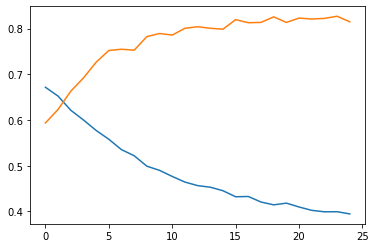

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

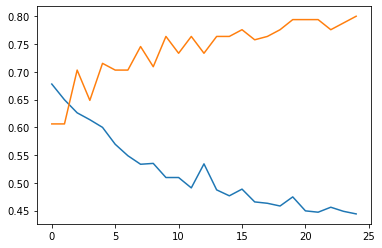

In [33]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [34]:
# Augmentation
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8])  # brightness

In [35]:
# Epochs
epochs = 25
# Batch size
batch_size = 32

history = model.fit(train_datagen.flow(x_train,y_train,
                                       batch_size=batch_size, 
                                       seed=27,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test,y_test),
                    verbose=1)

Epoch 1/25
46/46 [==============================] - 23s 493ms/step - loss: 16.7597 - accuracy: 0.7723 - val_loss: 0.4895 - val_accuracy: 0.7939
Epoch 2/25
46/46 [==============================] - 23s 499ms/step - loss: 6.3711 - accuracy: 0.7543 - val_loss: 0.5833 - val_accuracy: 0.8121
Epoch 3/25
46/46 [==============================] - 23s 499ms/step - loss: 2.8237 - accuracy: 0.7474 - val_loss: 0.6506 - val_accuracy: 0.7939
Epoch 4/25
46/46 [==============================] - 23s 498ms/step - loss: 0.8798 - accuracy: 0.7529 - val_loss: 0.6757 - val_accuracy: 0.7879
Epoch 5/25
46/46 [==============================] - 23s 498ms/step - loss: 0.5508 - accuracy: 0.7591 - val_loss: 0.6771 - val_accuracy: 0.7636
Epoch 6/25
46/46 [==============================] - 23s 498ms/step - loss: 0.5514 - accuracy: 0.7612 - val_loss: 0.6774 - val_accuracy: 0.7818
Epoch 7/25
46/46 [==============================] - 23s 498ms/step - loss: 0.5331 - accuracy: 0.7688 - val_loss: 0.6710 - val_accuracy: 0.775

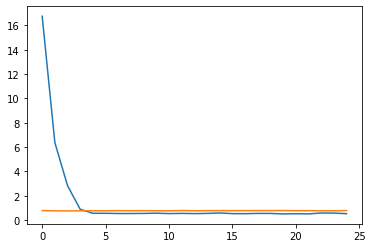

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

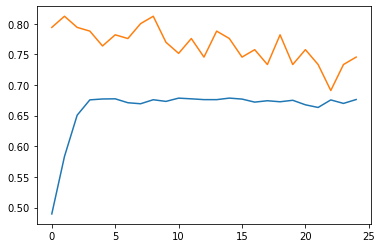

In [37]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [38]:
X_train

NameError: name 'X_train' is not defined